# Table of Contents

1. [Question 1](#q1)
2. [Question 2](#q2)
3. [Question 3](#q3)
4. [Question 4](#q4)
5. [Question 5](#q5)
6. [Question 6](#q6)

<a id='q1'></a>

# Question 1

In [24]:
# Cleaning work env.

rm(list=ls())
#Setting working directory
setwd("/Users/pedrogiraodesouza/Documents/Mestrado EESP - 2023")

#Loading Packages

library("AER")
library("dynlm") 
library("forecast") 
library("readxl")
library("stargazer") 
library("scales")
library("quantmod")
library("urca")
library(readr)
library("vars")
library('ggplot2')

#Loading Dataset

data_brazil <- read_csv("Problem Set 3/data/data_brazil.csv", 
                        col_types = cols(date = col_date(format = "%Y"))) 

View(data_brazil)

date,real_gdp_growth_pct,exchange_rate_real_dolar_annual_average,ipc_fipe_pct
<date>,<dbl>,<dbl>,<dbl>
1901-01-01,14.3646409,NA,NA
1902-01-01,-0.4830918,NA,NA
1903-01-01,1.9417476,NA,NA
1904-01-01,1.4285714,NA,NA
1905-01-01,3.2863850,NA,NA
1906-01-01,12.7272727,NA,NA
1907-01-01,0.8064516,NA,NA
1908-01-01,-3.2000000,NA,NA
1909-01-01,10.3305785,NA,NA


In [28]:
#Define each time series for the specified time period (1942-2019)
main_ts <-ts(data=data_brazil[,-1], start=1901, frequency=1)
ts_gdpg <- xts(data_brazil$real_gdp_growth_pct,order.by = data_brazil$date )
ts_gdp1 <-  ts(data = data_brazil$real_gdp_growth_pct , start=1901,  frequency=1)
ts_xrate1 <- ts(data_brazil$exchange_rate_real_dolar_annual_average, start=1901,frequency = 1)
ts_infl1 <- ts(data_brazil$ipc_fipe_pct, start=1901, frequency=1)

ADL_21_xrate <-ts.union(ts_gdp1,ts_xrate1)
ADL_22_infl <- ts.union(ts_gdp1,ts_infl1)
ts_joint <-ts.union(ts_gdp1,ts_xrate1,ts_infl1)

#Subsets 
subset1 <- window(ADL_21_xrate, c(2018,1), c(2019,1))
subset2 <- window(ADL_22_infl,c(2018,1),c(2019,1))
subset3 <- window(ts_joint, c(2018,1),c(2019,1))

1.1. Coefficients and Std. Errors

In [29]:
#Estimate ADL(2,1) for gdp growth on exchange rate
GDPXRATE_ADL21 <- dynlm(ts_gdp1 ~ Lag(ts_gdp1)+Lag(ts_gdp1,2)+Lag(ts_xrate1) , 
                        start=c(1942,1),end=c(2020,1))  
summary(GDPXRATE_ADL21)


Time series regression with "ts" data:
Start = 1942, End = 2018

Call:
dynlm(formula = ts_gdp1 ~ Lag(ts_gdp1) + Lag(ts_gdp1, 2) + Lag(ts_xrate1), 
    start = c(1942, 1), end = c(2020, 1))

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6247 -2.3231  0.6414  2.2058  7.7088 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)       2.8932     0.8987   3.219  0.00192 **
Lag(ts_gdp1)      0.2635     0.1195   2.204  0.03065 * 
Lag(ts_gdp1, 2)   0.2357     0.1170   2.014  0.04765 * 
Lag(ts_xrate1)   -0.6903     0.3968  -1.740  0.08616 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.493 on 73 degrees of freedom
  (39 observations deleted due to missingness)
Multiple R-squared:  0.3104,	Adjusted R-squared:  0.282 
F-statistic: 10.95 on 3 and 73 DF,  p-value: 5.084e-06


1.2. Forecast

In [30]:
ADL_21_xrate_f <- coef(GDPXRATE_ADL21) %*% c(1, subset1[2,1], subset1[1,1],
                                             subset1[2,2])
ADL_21_xrate_f

0.9126265


2.1 Coefficients and Std. Errors

In [31]:
#Estimate ADL(2,2) for gdp growth on inflation
GDPINF_ADL22 <- dynlm(ts_gdp1 ~  Lag(ts_gdp1)+
                        Lag(ts_gdp1,2)+Lag(ts_infl1)+Lag(ts_infl1,2), 
                        start=c(1942,1),end=c(2019,1))
summary(GDPINF_ADL22)


Time series regression with "ts" data:
Start = 1942, End = 2018

Call:
dynlm(formula = ts_gdp1 ~ Lag(ts_gdp1) + Lag(ts_gdp1, 2) + Lag(ts_infl1) + 
    Lag(ts_infl1, 2), start = c(1942, 1), end = c(2019, 1))

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5390 -1.9086  0.3872  2.1898  8.1001 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)       2.2457069  0.7414538   3.029  0.00341 **
Lag(ts_gdp1)      0.2930720  0.1185673   2.472  0.01581 * 
Lag(ts_gdp1, 2)   0.2814695  0.1143601   2.461  0.01624 * 
Lag(ts_infl1)    -0.0009509  0.0013698  -0.694  0.48979   
Lag(ts_infl1, 2) -0.0005011  0.0013827  -0.362  0.71814   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.545 on 72 degrees of freedom
  (35 observations deleted due to missingness)
Multiple R-squared:  0.2993,	Adjusted R-squared:  0.2603 
F-statistic: 7.688 on 4 and 72 DF,  p-value: 3.241e-05


2.2

In [32]:
ADL_22_inf_f <- coef(GDPINF_ADL22) %*% c(1, subset2[2,1], subset2[1,1],
                                         subset2[2,2],subset2[1,2])
ADL_22_inf_f

3.099833


3.1. Coefficients and Std. Errors

In [33]:
#Estimate ADL(2,2) for gdp growth on both inflation and exchange rate
GDPXRATEINF <- dynlm(ts_gdp1 ~ Lag(ts_gdp1) +
                             Lag(ts_gdp1,2) + Lag(ts_xrate1) + Lag(ts_xrate1,2)+
                             Lag(ts_infl1) + Lag(ts_infl1,2), start=c(1942,1),
                            end=c(2019,1))
summary(GDPXRATEINF)


Time series regression with "ts" data:
Start = 1942, End = 2018

Call:
dynlm(formula = ts_gdp1 ~ Lag(ts_gdp1) + Lag(ts_gdp1, 2) + Lag(ts_xrate1) + 
    Lag(ts_xrate1, 2) + Lag(ts_infl1) + Lag(ts_infl1, 2), start = c(1942, 
    1), end = c(2019, 1))

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8018 -2.0209  0.7636  2.1430  7.4113 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.301668   1.096552   3.923 0.000202 ***
Lag(ts_gdp1)       0.164004   0.123669   1.326 0.189102    
Lag(ts_gdp1, 2)    0.195355   0.122238   1.598 0.114512    
Lag(ts_xrate1)    -2.416700   1.922102  -1.257 0.212816    
Lag(ts_xrate1, 2)  1.208676   1.789710   0.675 0.501680    
Lag(ts_infl1)     -0.001631   0.001367  -1.193 0.237071    
Lag(ts_infl1, 2)  -0.001264   0.001395  -0.906 0.367955    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.417 on 70 degrees of freedom
  (39 observations deleted due to mis

3.1. Forecast

In [34]:
xrateinf_f <- coef(GDPXRATEINF) %*% c(1,subset3[2,1],subset3[1,1], 
                                                   subset3[2,2], subset3[1,2],
                                                   subset3[2,3],subset3[1,3])
xrateinf_f

-0.2773175


4.1. Coefficients and Std. Errors

In [35]:
ts_gdp2<-window(ts_gdp1, c(1942,1),c(2019,1))

ARMA_20_2 <-Arima(ts_gdp2, c(2,0,0) )
summary(ARMA_20_2)

Series: ts_gdp2 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1     ar2    mean
      0.3263  0.2938  4.4714
s.e.  0.1121  0.1128  1.0064

sigma^2 = 12.49:  log likelihood = -207.83
AIC=423.66   AICc=424.21   BIC=433.09

Training set error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE
Training set 0.0641576 3.465564 2.812193 138.0944 260.1555 0.8649305
                    ACF1
Training set -0.00623713

4.2. Forecast

In [36]:
arma_f <-predict(ARMA_20_2, n_ahead=1)
arma_f$pred

A Time Series:
[1] 2.621279

5. 

In [37]:
#Difference between model 1 prediction and realized value
abs(as.numeric(window(ts_gdp1,c(2020,1),c(2020,1)))-as.numeric(ADL_21_xrate_f))
#Difference between model 2 prediction and realized value
abs(as.numeric(window(ts_gdp1,c(2020,1),c(2020,1)))-as.numeric(ADL_22_inf_f))
#Difference between model 3 prediction and realized value
abs(as.numeric(window(ts_gdp1,c(2020,1),c(2020,1)))-as.numeric(xrateinf_f))
#Difference between model 4 prediction and realized value
abs(as.numeric(window(ts_gdp1,c(2020,1),c(2020,1)))-as.numeric(arma_f$pred))


[1] 4.791303

[1] 6.978509

[1] 3.601359

[1] 6.499955

The model whose prediction is the closest to the realized value is model 3

***

<a id='q2'></a>

# Question 2

If the vector process $\{\mathbf{Y}_t\}$ follows a [covariance-stationary](#def_cov) [Var(p) model](#def_var), then

$$\mathbb{E}[Y_t]=\mathbb{E}[c+{\Phi}_1\cdot {Y}_{t-1}+{\Phi}_2 \cdot {Y}_{t-2}+\cdots+ {\Phi}_p \cdot {Y}_{t-p}+{\epsilon}_t]$$

$$\mathbb{E}[Y_t]=\mathbb{E}[c]+\mathbb{E}[{\Phi}_1\cdot {Y}_{t-1}]+\mathbb{E}[{\Phi}_2 \cdot {Y}_{t-2}]+\cdots+\mathbb{E}[{\Phi}_p \cdot {Y}_{t-p}]+\mathbb{E}[{\epsilon}_t]$$

$$\mathbb{E}[Y_t]=c+{\Phi}_1\cdot\mathbb{E}[ {Y}_{t-1}]+{\Phi}_2 \cdot \mathbb{E}[ {Y}_{t-2}]+\cdots+{\Phi}_p \cdot\mathbb{E}[ {Y}_{t-p}]$$


$$\mathbb{E}[Y_t]-{\Phi}_1\cdot\mathbb{E}[ {Y}_{t-1}]-{\Phi}_2 \cdot \mathbb{E}[ {Y}_{t-2}]- \cdots -{\Phi}_p \cdot\mathbb{E}[ {Y}_{t-p}]=c$$


As the process is covariance-stationary, this is equivalent to

$$\mathbb{E}[Y_t]-{\Phi}_1\cdot\mathbb{E}[ {Y}_{t}]-{\Phi}_2 \cdot \mathbb{E}[ {Y}_{t}]- \cdots -{\Phi}_p \cdot\mathbb{E}[ {Y}_{t}]=c$$


or

$$(I-\Phi_1 - \Phi_2 - \cdots - \Phi_p)\mathbb{E}[Y_t]=c$$

$$\mathbb{E}[Y_t]=(I-\Phi_1 - \Phi_2 - \cdots - \Phi_p)^{-1}\cdot c$$

***

<a id='q3'></a>

# Question 3

$$\Gamma_j=\mathbb{E}[(Y_t -\mu)(Y_{t-j} - \mu)^{\top}]$$

Since the process is [covariance-stationary](#def_cov), it is implied that $\Gamma_j$ does not depend on $t$, such that we can arbitrarily pick any value for it, such as $t+j$ 

$$\Gamma_j=\mathbb{E}[(Y_{t+j}-\mu)(Y_{t-j+j}-\mu)^{\top}]=\mathbb{E}[(Y_{t+j}-\mu)(Y_{t}-\mu)^{\top}]$$

As it implies that $\Gamma_j$ does not depend on $t$, so we can pick t arbitrarily.

$$\Gamma_{-j}=\mathbb{E}[(Y_{t-j} -\mu)(Y_{t} - \mu)^{\top}]=\mathbb{E}[(Y_{t-j+j} -\mu)(Y_{t+j} - \mu)^{\top}]=\mathbb{E}[(Y_{t} -\mu)(Y_{t+j} - \mu)^{\top}]=\Gamma_j^{\top}$$

***

<a id='q4'></a>

# Question 4


To prove[covariance-stationarity](#def_cov) we need to prove that

- [ ] $\mathbb{E}[\mathbf{Y}_t]$ does not depend on $t$
- [ ] $\mathbb{E}[\mathbf{Y}_t\mathbf{Y}^{\top}_{t-j}  ]$ does not depend on $t$

The mean of a Vector MA($q$) process as described can be written as

$$\mathbb{E}[{Y_t}]=\mathbb{E}[\mu + \epsilon_{t}+\Theta_{1}\epsilon_{t-1}+\Theta_{2}\epsilon_{t-2}+\cdots+\Theta_{q}\epsilon_{t-q}]$$

$$\mathbb{E}[{Y_t}]=\mathbb{E}[\mu] + \mathbb{E}[\epsilon_{t}]+\mathbb{E}[\Theta_{1}\epsilon_{t-1}]+\mathbb{E}[\Theta_{2}\epsilon_{t-2}]+\cdots+\mathbb{E}[\Theta_{q}\epsilon_{t-q}]$$

$$\mathbb{E}[{Y_t}]=\mu+ \mathbb{E}[\epsilon_{t}]+\Theta_{1}\cdot\mathbb{E}[\epsilon_{t-1}]+\Theta_{2}\cdot\mathbb{E}[\epsilon_{t-2}]+\cdots+\Theta_{q}\cdot\mathbb{E}[\epsilon_{t-q}]$$

From our definition of the generalization of white noise, $\mathbb{E}[\epsilon_i]=0$. So

$$\mathbb{E}[Y_t]=\mu$$

And therefore, the process is mean-stationary in the sense of it's mean not being a function of $t$

- [x] $\mathbb{E}[\mathbf{Y}_t]$ does not depend on $t$
- [ ] $\mathbb{E}[\mathbf{Y}_t\mathbf{Y}^{\top}_{t-j}  ]$ does not depend on $t$

The covariance of a Vector Ma($q$) process is given by

$$\Gamma_j=\mathbb{E}[(Y_{t+j}-\mathbb{E}[Y_{t+j}])(Y_{t}-\mathbb{E}[Y_t])^{\top}]$$

$$\Gamma_j=\mathbb{E}[(Y_{t+j}-\mu)(Y_t-\mu)^{\top}]$$

$$\Gamma_j=\mathbb{E}[(\epsilon_{t+j}+\Theta_{1}\epsilon_{t+j-1}+\cdots+\Theta_{q}\epsilon_{t+j-q})( \epsilon_{t}+\Theta_{1}\epsilon_{t-1}+\cdots+\Theta_{q}\epsilon_{t-q})^{\top}]$$

From our definition of the generalization of white noise,
$$\mathbb{E}[\epsilon_t \cdot \epsilon{\tau}^{\top}]=
\begin{cases}
\Omega, & \text{for } t=\tau \\
0, & \text{else}
\end{cases}$$

Consequently, it follows that if $|j|>q$ then $\Gamma_j=0$

If not, then we can realize that the only case when $\mathbb{E}[(\Theta_{k}\epsilon_{t+j-k})(\Theta_i\epsilon_{t-i})^{\top}]\neq 0$


is when $k-j=i$, in which case $$\mathbb{E}[\Theta_{k}\epsilon_{t+j-k}\cdot(\Theta_i\epsilon_{t-i})^{\top}]=\Theta_k\Omega\Theta_i^{\top}$$

Therefore, if $0<j<q$ 
$$\Gamma_j=\mathbb{E}[(\Theta_j \epsilon_t \cdot \epsilon_t^{\top} )+(\Theta_{j+1} \epsilon_{t-1} \cdot \epsilon_{t-1}^{\top} \Theta_1^{\top} )+\cdots+(\Theta_{q} \epsilon_q \cdot \epsilon_q^{\top} \Theta_{q-j}^{\top})]$$

$$\Gamma_j=(\Theta_j \Omega )+(\Theta_{j+1} \Omega \Theta_1^{\top} )+\cdots+(\Theta_{q} \Omega \Theta_{q-j}^{\top})$$

With a very similar manipulation we arrive at 
$$\Gamma_j=( \Omega \Theta_{-j}^{\top})+(\Theta_{1} \Omega \Theta_{1-j}^{\top} )+\cdots+(\Theta_{q+j} \Omega \Theta_{q}^{\top})$$

- [x] $\mathbb{E}[\mathbf{Y}_t]$ does not depend on $t$
- [x] $\mathbb{E}[\mathbf{Y}_t\mathbf{Y}^{\top}_{t-j}  ]$ does not depend on $t$

With that, we have proven covariance-stationarity

***

<a id='q5'></a>

# Question 5



- [ ] $\bar{Y}_t \xrightarrow{p} \mu$
- [ ] $\lim{T \to \infty}\{T\cdot \mathbb{E}[(\bar{Y}_T - \mu)(\bar{Y}_T - \mu)^{\top}]=\sum_{v=-\infty}^{\infty}\Gamma_v$

One way to prove $\bar{Y}_t \xrightarrow{p} \mu$ is by proving convergence in mean-squared, i.e. $\lim_{n \to \infty}\mathbb{E}[|\bar{Y}_t-\mu|^2]=0$

$$\mathbb{E}[(\bar{Y}_t-\mu)(\bar{Y}_t-\mu)^{\top}]=\mathbb{E}\left[\left(\frac{1}{T}\cdot\sum_{t=1}^{T} Y_{t}-\mu\right)\left(\frac{1}{T}\cdot\sum_{t=1}^{T} Y_{t}-\mu\right)^{\top}\right]$$
$$\mathbb{E}[(\bar{Y}_t-\mu)(\bar{Y}_t-\mu)^{\top}]=\frac{1}{T}\frac{1}{T}\mathbb{E}\left[(Y_1-\mu)\cdot\left(\sum_{t=1}^{T}Y_{t}-\mu\right)^{\top}+(Y_2-\mu)\cdot\left(\sum_{t=1}^{T}Y_{t}-\mu\right)^{\top}+\cdots+(Y_T-\mu)\cdot\left(\sum_{t=1}^{T}Y_{t}-\mu\right)^{\top}\right]$$

$$\mathbb{E}[(\bar{Y}_t-\mu)(\bar{Y}_t-\mu)^{\top}]=\frac{1}{ T^{2}} \sum_{h=1}^{T} \left( \sum_{ t = 1 }^{T} \Gamma_{h - t}\right)$$
 


Such that
$$\mathbb{E}[(\bar{Y}_t-\mu)(\bar{Y}_t-\mu)^{\top}]=\frac{1}{T^2}(T\cdot\Gamma_0 +(T-1)\Gamma_1+\cdots+\Gamma_{T-1}+(T-1)\Gamma_{-1}+(T-2)\Gamma_{-2}+\cdots+\Gamma_{1-T}$$

Consequently,
$$T\cdot\mathbb{E}[(\bar{Y}_t-\mu)(\bar{Y}_t-\mu)^{\top}]=\frac{1}{T}(T\cdot\Gamma_0 +(T-1)\Gamma_1+\cdots+\Gamma_{T-1}+(T-1)\Gamma_{-1}+(T-2)\Gamma_{-2}+\cdots+\Gamma_{1-T}$$
$$T\cdot\mathbb{E}[(\bar{Y}_t-\mu)(\bar{Y}_t-\mu)^{\top}]=\sum_{\nu=-(T-1)}^{T-1}\frac{|\nu|}{T}\Gamma_{\nu}$$
Such that as $T$ grows, the autocovariances with coefficient closest to $0$ approach unity while the autocovariances with coefficients farther from $0$ go to null.

Note that by denoting the $i$-th row and $j$-th row element of matrix $\Gamma_k$ as $\gamma_{i,j}^{k}$, and recalling that absolute summability means that the series $\sum |\gamma_{i,j}^{k}|$ converges  and it's variation is bounded, such that for any $\delta$ there exists $q$ large enough to satisfy

$$\sum_{|\nu|>m} |\gamma_{i,j}^{\nu}|<\frac{\delta}{3}$$

and 

$$\sum_{\nu=-\infty}^{\infty}\Gamma_{\nu} -T\cdot\mathbb{E}[(\bar{Y}_t-\mu)(\bar{Y}_t-\mu)^{\top}]= \sum_{|\nu|\geq T}\Gamma_{\nu}+\sum_{\nu=-(T-1)}^{T-1}\frac{|\nu|}{T}\Gamma_{\nu}$$

From the triangular inequality

$$0\leq\left|\sum_{|\nu|\geq T}\gamma_{i,j}^{\nu} + \sum_{\nu=-(T-1)}^{T-1}\frac{|\nu|}{T}\gamma_{i,j}^{\nu}\right|\leq \sum_{|\nu|\geq T}\gamma_{i,j}^{\nu} + \sum_{\nu=-(T-1)}^{T-1}\frac{|\nu|}{T}\gamma_{i,j}^{\nu} < \sum_{|\nu|>m} |\gamma_{i,j}^{\nu}|+\sum_{\nu=-(T-1)}^{T-1}\frac{|\nu|}{T}|\gamma_{i,j}^{\nu}|$$

Note that for any $\delta$ there existes large enough $T$ such that $q=T-1$ is large enough to satisfy
$$\frac{\delta}{3}+\frac{1}{q+1}\sum_{\nu=-q}^{q}|\nu||\gamma_{i,j}^{\nu}|<\delta$$

Consequently, for any $\delta$ there is $T$ large enough so that 
$$|\sum_{\nu=-\infty}^{\infty}\Gamma_{\nu} -T\cdot\mathbb{E}[(\bar{Y}_t-\mu)(\bar{Y}_t-\mu)^{\top}]|<\delta$$


Implying 
$$\lim_{T\to \infty}  \left(\sum_{\nu=-\infty}^{\infty}\Gamma_{\nu} -T\cdot\mathbb{E}[(\bar{Y}_t-\mu)(\bar{Y}_t-\mu)^{\top}]\right)=0$$


Since convergence in $L_2$ implies convergence in probability, this implies 
$$\bar{Y}_t\xrightarrow{p}\mu$$

***

<a id='q6'></a>

# Question 6

1.a.i. Coefficients

In [38]:
second_ts<-window(main_ts,c(1942,1),c(2019,1))
rf1 <- VAR(second_ts,p=1,type='both')

stargazer(rf1$varresult, type='text')


                                                Dependent variable:      
                                           ------------------------------
                                                         y               
                                             (1)       (2)        (3)    
-------------------------------------------------------------------------
real_gdp_growth_pct.l1                     0.264**    -0.001    -15.701* 
                                           (0.109)   (0.007)    (9.381)  
                                                                         
exchange_rate_real_dolar_annual_average.l1  0.066    1.010***  -150.974**
                                           (0.667)   (0.041)    (57.447) 
                                                                         
ipc_fipe_pct.l1                             -0.001    0.0001    0.550*** 
                                           (0.001)   (0.0001)   (0.096)  
                                     

1.a.ii. Forecast

In [39]:
rf1_f <-predict(rf1, n.ahead=1)
rf1_f
rf1_gdp_f<-rf1_f$fcst$real_gdp_growth_pct[1,1]
rf1_gdp_f

$real_gdp_growth_pct
                             fcst     lower    upper    CI
real_gdp_growth_pct.fcst 1.245006 -5.338994 7.829006 6.584

$exchange_rate_real_dolar_annual_average
                                                 fcst    lower    upper
exchange_rate_real_dolar_annual_average.fcst 4.091866 3.691545 4.492188
                                                    CI
exchange_rate_real_dolar_annual_average.fcst 0.4003216

$ipc_fipe_pct
                       fcst     lower   upper       CI
ipc_fipe_pct.fcst -152.4584 -719.2948 414.378 566.8364


[1] 1.245006

1.b.i. Coefficients

In [40]:

rf2 <- VAR(second_ts,p=2,type='both')
stargazer(rf2$varresult, type='text')


                                                Dependent variable:     
                                           -----------------------------
                                                         y              
                                             (1)       (2)        (3)   
------------------------------------------------------------------------
real_gdp_growth_pct.l1                      0.235*    0.003     -14.424 
                                           (0.121)   (0.007)   (10.303) 
                                                                        
exchange_rate_real_dolar_annual_average.l1  -1.069   1.315***  -233.080 
                                           (2.025)   (0.121)   (172.454)
                                                                        
ipc_fipe_pct.l1                             0.0001    0.0001   0.655*** 
                                           (0.001)   (0.0001)   (0.120) 
                                                  

$$ \mathbb{E}[\bar{Y}_t]=\mathbb{E}\left[ \frac{\sum_{t=1}^{T} Y_{t}}{T}\right]$$
$$ \mathbb{E}[\bar{Y}_t]=\frac{1}{T}\mathbb{E}\left[\sum_{t=1}^{T} Y_t\right]=\frac{T\cdot\mathbb{E}[Y_t]}{T}=\mu$$

1.b.ii. Forecast

In [41]:
rf2_f <- predict(rf2, n.ahead=1)
rf2_f
rf2_gdp_f<-rf2_f$fcst$real_gdp_growth_pct[1,1]
rf2_gdp_f

$real_gdp_growth_pct
                             fcst     lower   upper       CI
real_gdp_growth_pct.fcst 1.518522 -5.046747 8.08379 6.565268

$exchange_rate_real_dolar_annual_average
                                                 fcst    lower    upper
exchange_rate_real_dolar_annual_average.fcst 4.099665 3.708178 4.491152
                                                    CI
exchange_rate_real_dolar_annual_average.fcst 0.3914871

$ipc_fipe_pct
                       fcst     lower    upper      CI
ipc_fipe_pct.fcst -183.3562 -742.6013 375.8888 559.245


[1] 1.518522

1.c.i. Coefficients

In [42]:
rf3 <- VAR(second_ts,p=3,type='both')
rf3


VAR Estimation Results:

Estimated coefficients for equation real_gdp_growth_pct: 
Call:
real_gdp_growth_pct = real_gdp_growth_pct.l1 + exchange_rate_real_dolar_annual_average.l1 + ipc_fipe_pct.l1 + real_gdp_growth_pct.l2 + exchange_rate_real_dolar_annual_average.l2 + ipc_fipe_pct.l2 + real_gdp_growth_pct.l3 + exchange_rate_real_dolar_annual_average.l3 + ipc_fipe_pct.l3 + const + trend 

                    real_gdp_growth_pct.l1 
                              0.2354147999 
exchange_rate_real_dolar_annual_average.l1 
                             -0.9129218255 
                           ipc_fipe_pct.l1 
                              0.0001230704 
                    real_gdp_growth_pct.l2 
                              0.2108884023 
exchange_rate_real_dolar_annual_average.l2 
                              0.6449170953 
                           ipc_fipe_pct.l2 
                             -0.0005125726 
                    real_gdp_growth_pct.l3 
                             -0.0260

1.c.ii. Forecast

In [43]:
rf3_f <- predict(rf3, n.ahead=1)
rf3_f
rf3_gdp_f<-rf3_f$fcst$real_gdp_growth_pct[1,1]
rf3_gdp_f

$real_gdp_growth_pct
                             fcst     lower    upper       CI
real_gdp_growth_pct.fcst 1.369724 -5.383877 8.123326 6.753601

$exchange_rate_real_dolar_annual_average
                                                 fcst    lower    upper
exchange_rate_real_dolar_annual_average.fcst 4.089524 3.696516 4.482532
                                                    CI
exchange_rate_real_dolar_annual_average.fcst 0.3930079

$ipc_fipe_pct
                       fcst     lower    upper       CI
ipc_fipe_pct.fcst -196.0816 -706.0719 313.9087 509.9903


[1] 1.369724

In [44]:
rf3_f$fcst$ipc_fipe_pct[1,1]

[1] -196.0816

In [45]:
rf2


VAR Estimation Results:

Estimated coefficients for equation real_gdp_growth_pct: 
Call:
real_gdp_growth_pct = real_gdp_growth_pct.l1 + exchange_rate_real_dolar_annual_average.l1 + ipc_fipe_pct.l1 + real_gdp_growth_pct.l2 + exchange_rate_real_dolar_annual_average.l2 + ipc_fipe_pct.l2 + const + trend 

                    real_gdp_growth_pct.l1 
                              0.2346568468 
exchange_rate_real_dolar_annual_average.l1 
                             -1.0689366026 
                           ipc_fipe_pct.l1 
                              0.0001366978 
                    real_gdp_growth_pct.l2 
                              0.1967366941 
exchange_rate_real_dolar_annual_average.l2 
                              1.4031142350 
                           ipc_fipe_pct.l2 
                             -0.0003558271 
                                     const 
                              5.2027015358 
                                     trend 
                             -0.0662

1.d. Closest Forecast

In [46]:

#Difference between model 1 prediction and realized value
abs(as.numeric(window(ts_gdp1,c(2020,1),c(2020,1)))-as.numeric(rf1_gdp_f))
#Difference between model 2 prediction and realized value
abs(as.numeric(window(ts_gdp1,c(2020,1),c(2020,1)))-as.numeric(rf2_gdp_f))
#Difference between model 3 prediction and realized value
abs(as.numeric(window(ts_gdp1,c(2020,1),c(2020,1)))-as.numeric(rf3_gdp_f))


[1] 5.123683

[1] 5.397198

[1] 5.248401

The model whose prediction is the closest to the realized value is model 1

2.a. Variable order

The ordering of our variables is an interesting question, due to the range of different exchange, monetary and fiscal policies that Brazil has enforced in the period between 1942 to 2020, the exact order of exogeneity has arguably changed over time. For the sake of simplicity, the chosen order reflects my beliefs around the current order of exogeneity:

- GDP growth

- Inflation

- Exchange

The argument for GDP relies in the permanence of of investments and government spending.

The argument for Inflation is based on [BACEN's mission](https://www.bcb.gov.br/en/about)
> To ensure the stability of the currency purchasing power, to foster a sound, efficient and competitive financial system, and to promote the economic well-being of society.

>With regard to price stability, the BCB considers that the best contribution of monetary policy to sustainable economic growth, low unemployment and improvement in people’s living conditions is keeping inflation low, stable and predictable — in consonance with the international and domestic experiences.

Tbe argument for the exchange rate is based on the current brazilian exchange-rate regime.

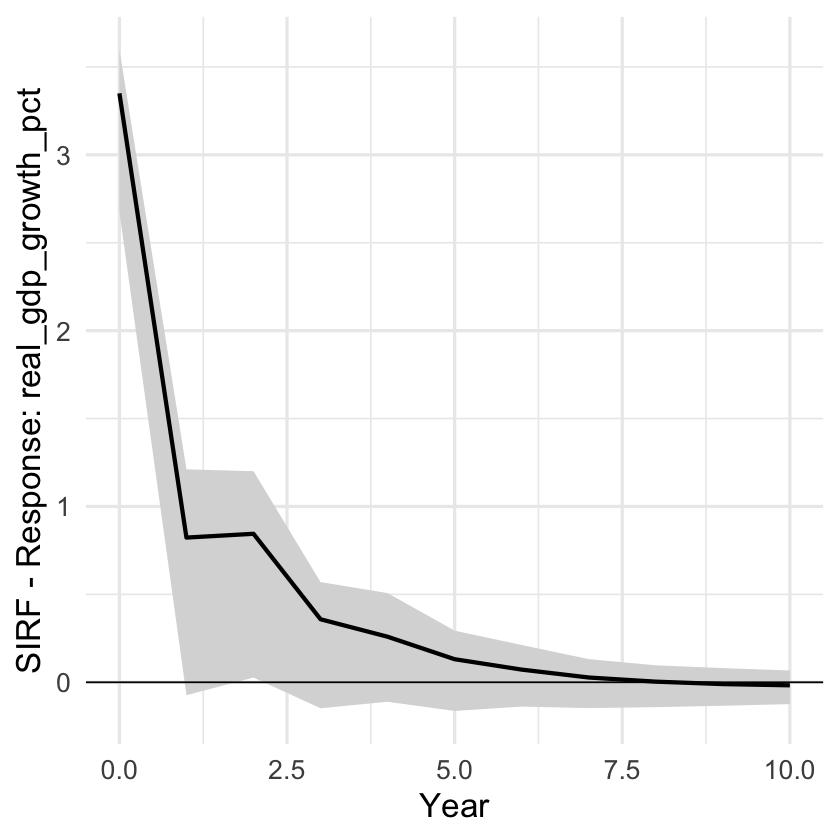

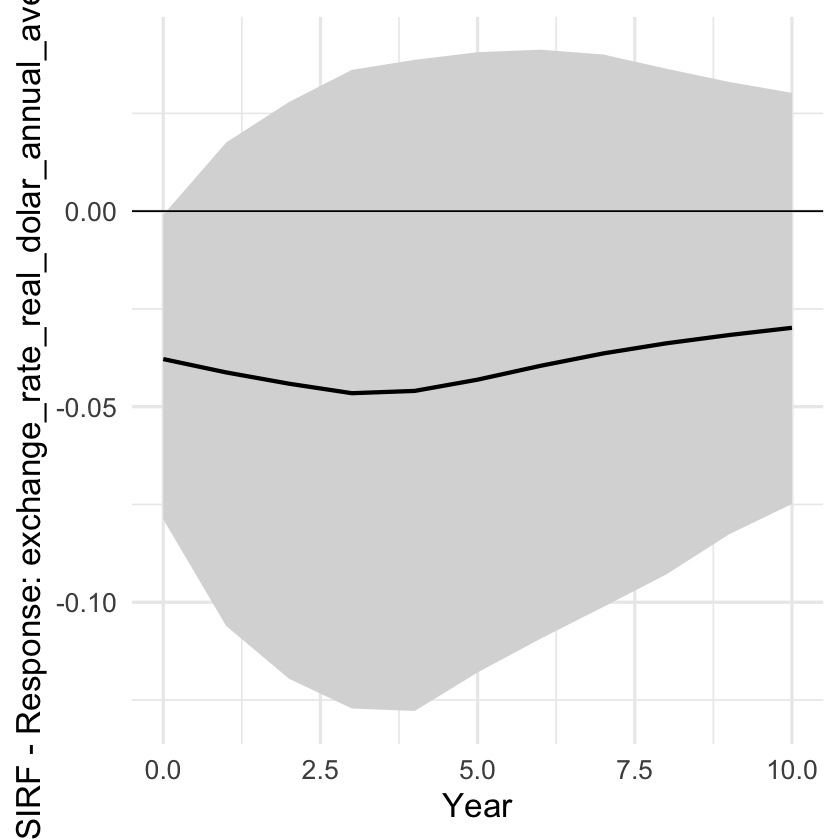

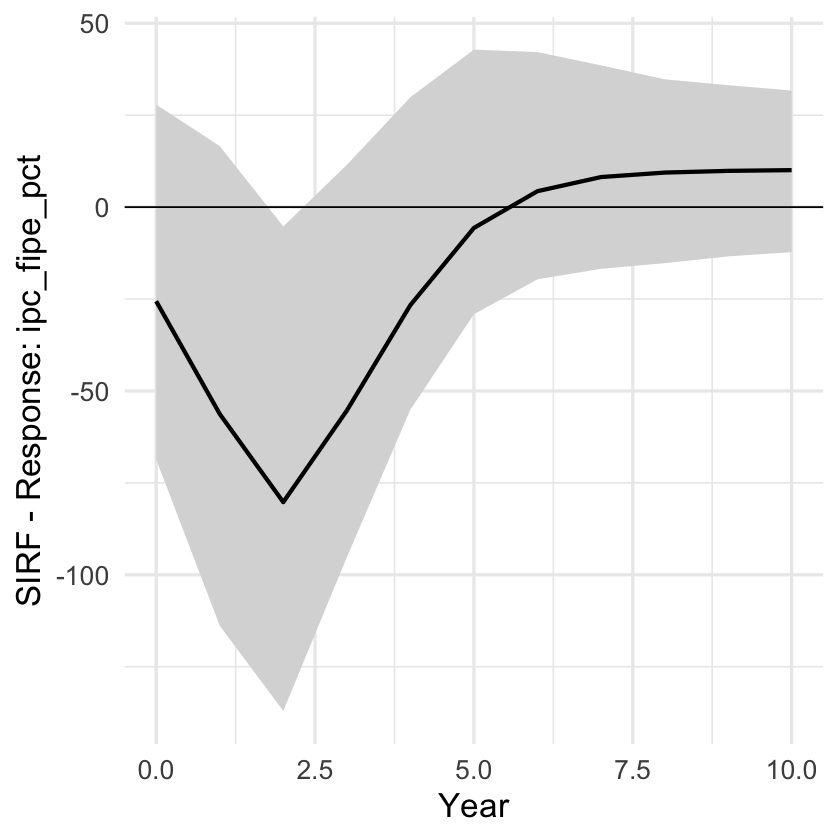

In [101]:
sirfgdpf <-irf(rf2,impulse='real_gdp_growth_pct', runs=1000,ci=0.9, ortho=TRUE, boot=TRUE, n.ahead=10)
#Plots for GDP growth as impulse
for (response in 1:3) {
  df <- data.frame( "period" = 0:10, "irf" = sirfgdpf$irf$real_gdp_growth_pct[, response],
    "CI_U" = sirfgdpf$Upper$real_gdp_growth_pct[, response],
    "CI_L" = sirfgdpf$Lower$real_gdp_growth_pct[, response]
  )
  colnames(df) <- c("period", "irf", "CI_U", "CI_L")

  # Define the label of the Y-axis
  ylabel <- paste0("SIRF - Response: ", colnames(sirfgdpf$irf$real_gdp_growth_pct)[response])

  gg <- ggplot(data = df, aes(x = period)) +
    theme_minimal(base_size = 20) +
    xlab("Year") + ylab(ylabel) +
    geom_ribbon(aes(ymin = CI_L, ymax = CI_U),fill="grey85" )+
  geom_line(aes(y = irf),size=1.2)+
    geom_hline(yintercept = 0, color = "black") 
  print(gg)

 
}

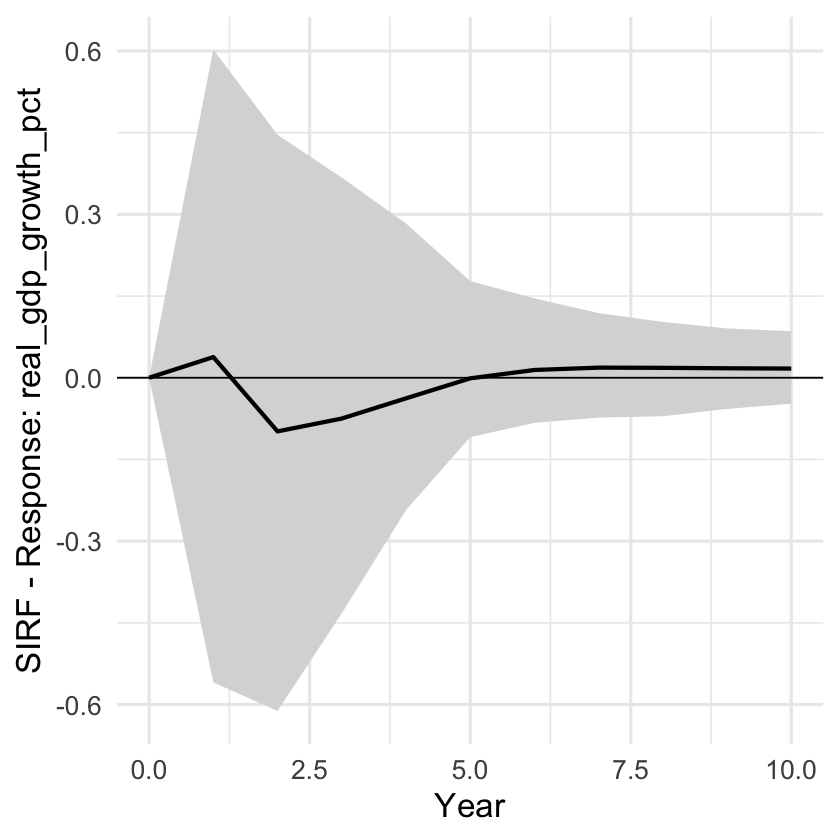

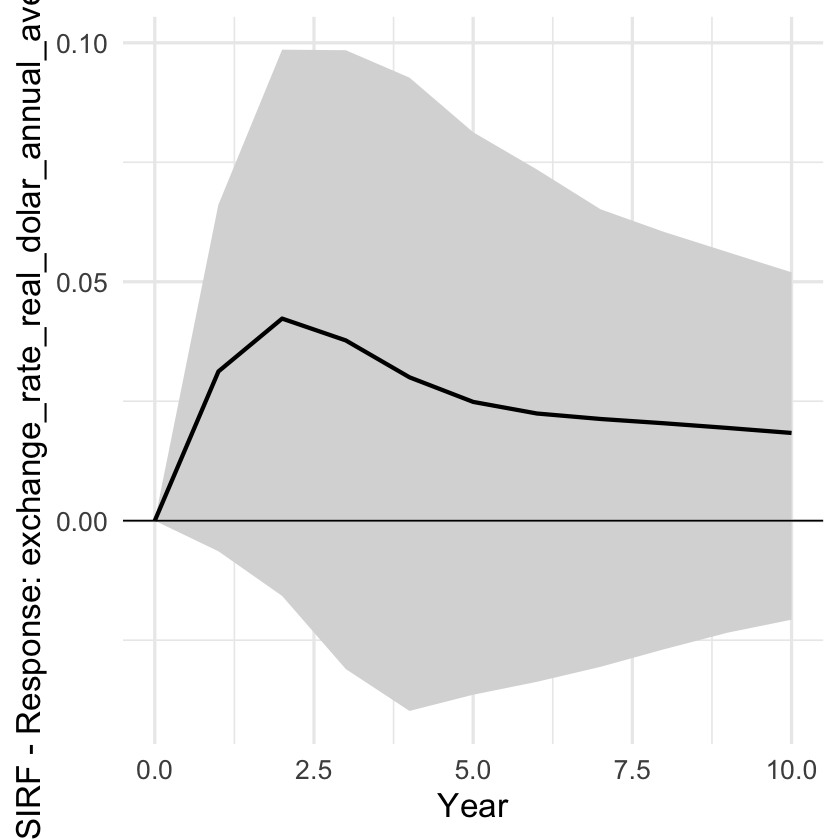

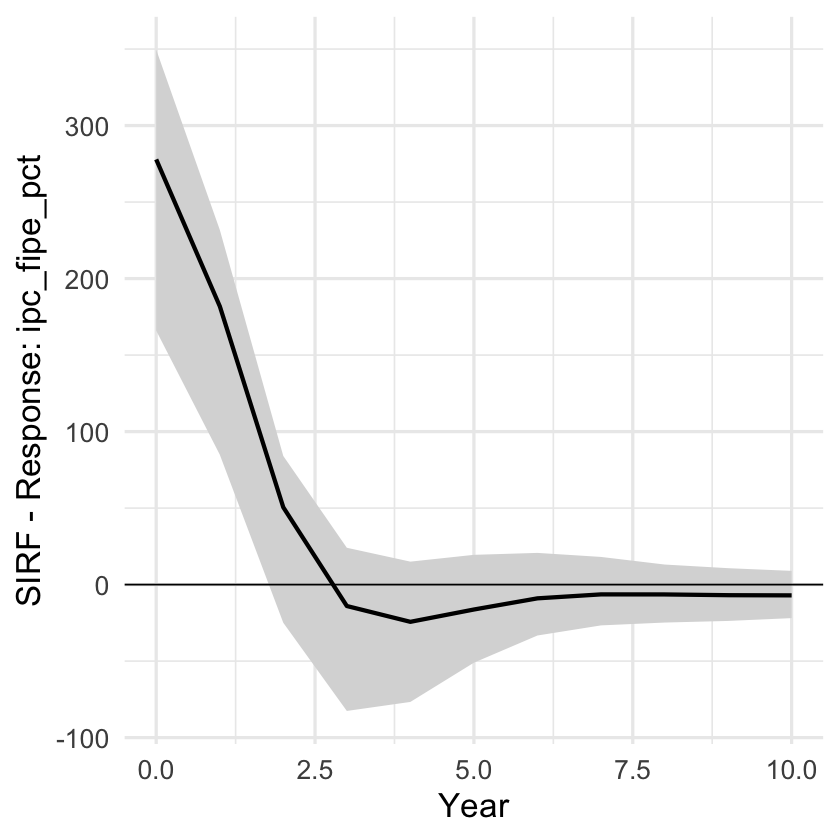

In [103]:
sirfinflf <-irf(rf2,impulse='ipc_fipe_pct', runs=1000,ci=0.9, ortho=TRUE, boot=TRUE, n.ahead=10)
#Plots for Inflation as impulse
for (response in 1:3) {
  df <- data.frame( "period" = 0:10, "irf" = sirfinflf$irf$ipc_fipe_pct[, response],
    "CI_U" = sirfinflf$Upper$ipc_fipe_pct[, response],
    "CI_L" = sirfinflf$Lower$ipc_fipe_pct[, response]
  )
  colnames(df) <- c("period", "irf", "CI_U", "CI_L")

  # Define the label of the Y-axis
    
  ylabel <- paste0("SIRF - Response: ", colnames(sirfinflf$irf$ipc_fipe_pct)[response])

  gg <- ggplot(data = df, aes(x = period)) +
    theme_minimal(base_size = 20) +
    xlab("Year") + ylab(ylabel) +
    geom_ribbon(aes(ymin = CI_L, ymax = CI_U),fill="grey85" )+
  geom_line(aes(y = irf),size=1.2)+
    geom_hline(yintercept = 0, color = "black") 
  print(gg)

 
}

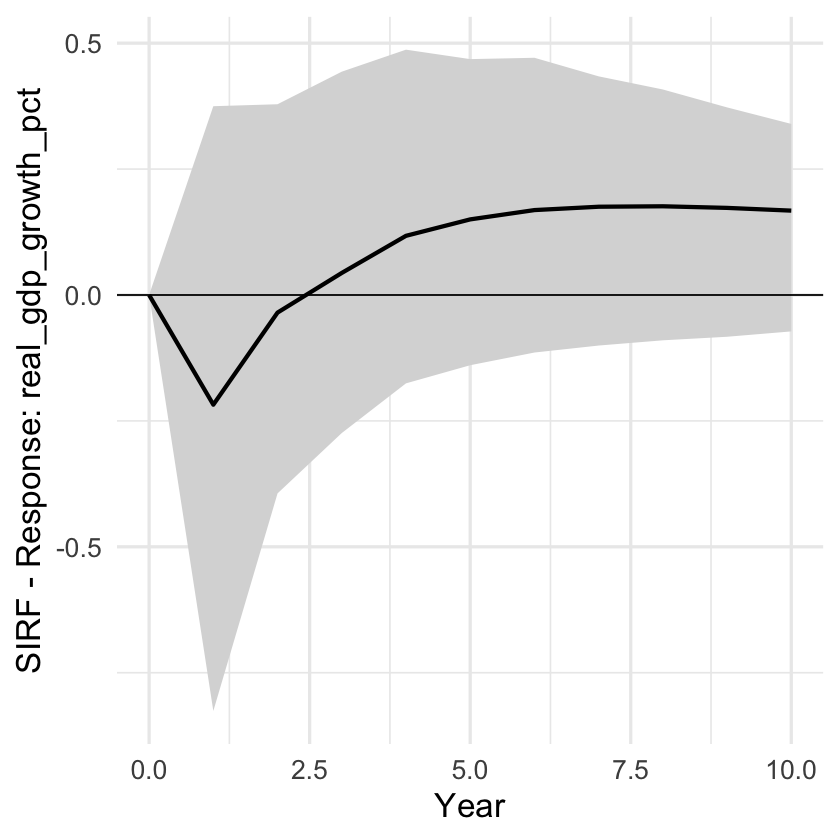

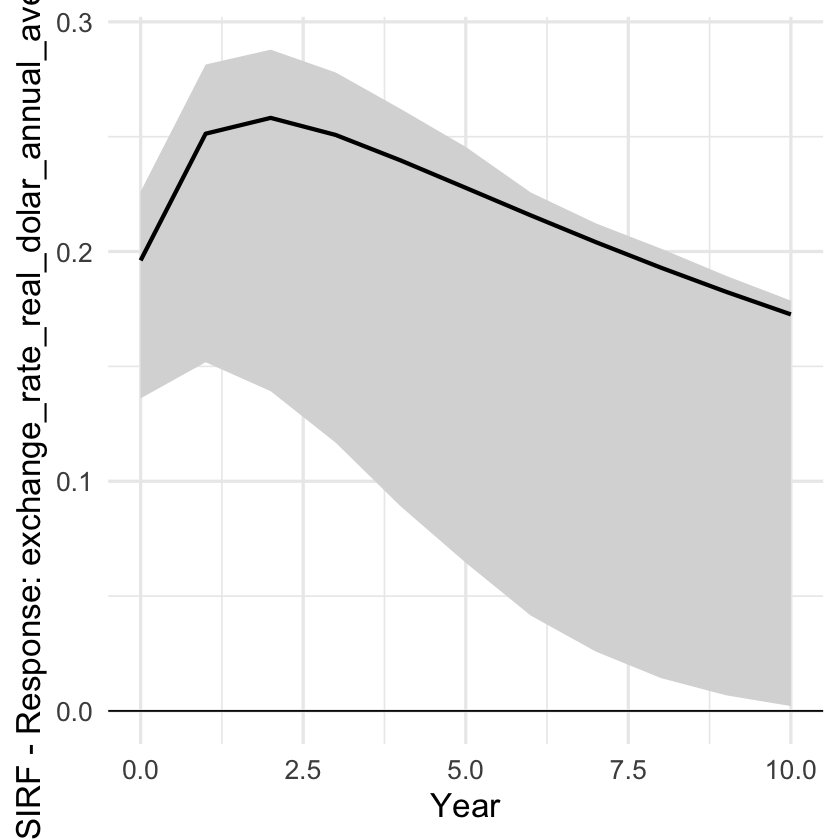

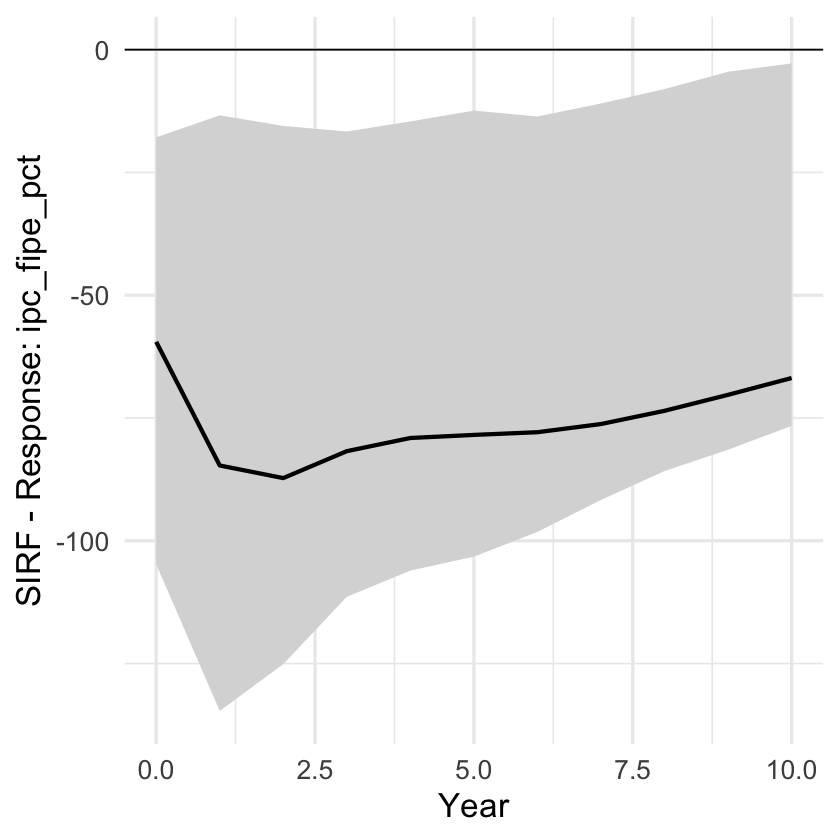

In [105]:
sirfxrstef <-irf(rf2,impulse='exchange_rate_real_dolar_annual_average', runs=1000,ci=0.9, ortho=TRUE, boot=TRUE, n.ahead=10)
#Plots for Inflation as impulse
for (response in 1:3) {
  df <- data.frame( "period" = 0:10, "irf" = sirfxrstef$irf$exchange_rate_real_dolar_annual_average[, response],
    "CI_U" = sirfxrstef$Upper$exchange_rate_real_dolar_annual_average[, response],
    "CI_L" = sirfxrstef$Lower$exchange_rate_real_dolar_annual_average[, response]
  )
  colnames(df) <- c("period", "irf", "CI_U", "CI_L")

  # Define the label of the Y-axis
  ylabel <- paste0("SIRF - Response: ", colnames(sirfxrstef$irf$exchange_rate_real_dolar_annual_average)[response])

  gg <- ggplot(data = df, aes(x = period)) +
    theme_minimal(base_size = 20) +
    xlab("Year") + ylab(ylabel) +
    geom_ribbon(aes(ymin = CI_L, ymax = CI_U),fill="grey85" )+
  geom_line(aes(y = irf),size=1.2)+
    geom_hline(yintercept = 0, color = "black") 
  print(gg)

 }

<a id='def_var'></a>

# VAR(p) Process

A $\{Y_t\}$ VAR(p) process is described by

$$ \mathbf{Y}_t = \mathbf{c} + \mathbf{\Phi}_1\cdot \mathbf{Y}_{t-1}+ \mathbf{\Phi}_2 \cdot \mathbf{Y}_{t-2}+\cdots+ \mathbf{\Phi}_p \cdot \mathbf{Y}_{t-p}+\mathbf{\epsilon}_t$$

where

- $c$ : (n x 1) vector of constants
- $\Phi_j$ : (n x n) matrix of autoregressive coefficients for $j=1,2,\cdots,p$
- $\epsilon_t$ : (n x 1) vector generalization of white noise

<a id='def_cov'></a>

# Definition: Vector Covariance-stationarity 

A vector process $\{
\mathbf{Y}_t\}$ is said to be covariance-stationary if it's first and second
moments ($\mathbb{E}[\mathbf{Y}_t]$ and $\mathbb{E}[\mathbf{Y}_t\mathbf{Y}^{\top}_{t-j}  ]$)
 are independet of time t

<a id='abs_sum'></a>